## Imports

In [43]:
import os
import glob
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

## 1. Set the Dataset Path

In [2]:
dataset_path = "../ipd_val/val/"  # Change if needed
if not os.path.exists(dataset_path):
    raise Exception(f"Dataset path {dataset_path} not found!")
print(f"Dataset path {dataset_path} found.")

Dataset path ../ipd_val/val/ found.


In [45]:
scenes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print("Available scenes:")
print(scenes)

Available scenes:
['000000', '000001', '000002', '000003', '000004', '000005', '000006', '000007', '000008', '000009', '000010', '000011', '000012', '000013', '000014']


In [46]:
scene_id = scenes[0]
scene_path = os.path.join(dataset_path, scene_id)
print(f"Exploring scene: {scene_id}")

# List all items in the scene directory
scene_items = sorted(os.listdir(scene_path))
print("Items in this scene:")
print(scene_items)

Exploring scene: 000000
Items in this scene:
['aolp_cam1', 'aolp_cam2', 'aolp_cam3', 'depth_cam1', 'depth_cam2', 'depth_cam3', 'depth_photoneo', 'dolp_cam1', 'dolp_cam2', 'dolp_cam3', 'rgb_cam1', 'rgb_cam2', 'rgb_cam3', 'rgb_photoneo', 'scene_camera_cam1.json', 'scene_camera_cam2.json', 'scene_camera_cam3.json', 'scene_camera_photoneo.json', 'scene_gt_cam1.json', 'scene_gt_cam2.json', 'scene_gt_cam3.json', 'scene_gt_info_cam1.json', 'scene_gt_info_cam2.json', 'scene_gt_info_cam3.json', 'scene_gt_info_photoneo.json', 'scene_gt_photoneo.json']


In [47]:
camera_folder_path = os.path.join(scene_path, scene_items[0])
print(f"Exploring camera folder: {camera_folder_path}")
camera_folders = [d for d in scene_items if os.path.isdir(os.path.join(scene_path, d))]
json_files = [f for f in scene_items if f.endswith(".json")]

print("\nCamera folders found:")
print(camera_folders)
print("\nJSON files found:")
print(json_files)

Exploring camera folder: ../ipd_val/val/000000\aolp_cam1

Camera folders found:
['aolp_cam1', 'aolp_cam2', 'aolp_cam3', 'depth_cam1', 'depth_cam2', 'depth_cam3', 'depth_photoneo', 'dolp_cam1', 'dolp_cam2', 'dolp_cam3', 'rgb_cam1', 'rgb_cam2', 'rgb_cam3', 'rgb_photoneo']

JSON files found:
['scene_camera_cam1.json', 'scene_camera_cam2.json', 'scene_camera_cam3.json', 'scene_camera_photoneo.json', 'scene_gt_cam1.json', 'scene_gt_cam2.json', 'scene_gt_cam3.json', 'scene_gt_info_cam1.json', 'scene_gt_info_cam2.json', 'scene_gt_info_cam3.json', 'scene_gt_info_photoneo.json', 'scene_gt_photoneo.json']


In [48]:
camera_json_map = {}
for cam in camera_folders:
    # Extract camera ID from folder name. For example, from "rgb_cam1" we extract "cam1".
    cam_id = cam.split('_')[-1]
    found_json = None
    for jf in json_files:
        if cam_id in jf:
            found_json = os.path.join(scene_path, jf)
            break
    camera_json_map[cam] = found_json

print("Camera to JSON mapping:")
for cam, jf in camera_json_map.items():
    print(f"  {cam}: {jf}")

Camera to JSON mapping:
  aolp_cam1: ../ipd_val/val/000000\scene_camera_cam1.json
  aolp_cam2: ../ipd_val/val/000000\scene_camera_cam2.json
  aolp_cam3: ../ipd_val/val/000000\scene_camera_cam3.json
  depth_cam1: ../ipd_val/val/000000\scene_camera_cam1.json
  depth_cam2: ../ipd_val/val/000000\scene_camera_cam2.json
  depth_cam3: ../ipd_val/val/000000\scene_camera_cam3.json
  depth_photoneo: ../ipd_val/val/000000\scene_camera_photoneo.json
  dolp_cam1: ../ipd_val/val/000000\scene_camera_cam1.json
  dolp_cam2: ../ipd_val/val/000000\scene_camera_cam2.json
  dolp_cam3: ../ipd_val/val/000000\scene_camera_cam3.json
  rgb_cam1: ../ipd_val/val/000000\scene_camera_cam1.json
  rgb_cam2: ../ipd_val/val/000000\scene_camera_cam2.json
  rgb_cam3: ../ipd_val/val/000000\scene_camera_cam3.json
  rgb_photoneo: ../ipd_val/val/000000\scene_camera_photoneo.json


In [49]:
sample_images_dict = {}

for camera_folder in camera_folders:
    camera_path = os.path.join(scene_path, camera_folder)
    image_files = sorted(glob.glob(os.path.join(camera_path, "*.png")))
    if image_files:
        sample_images_dict[camera_folder] = image_files[0]  # Take the first image as a sample
    else:
        sample_images_dict[camera_folder] = None
    print(f"Camera folder: {camera_folder}, Number of images: {len(image_files)}")


Camera folder: aolp_cam1, Number of images: 6
Camera folder: aolp_cam2, Number of images: 6
Camera folder: aolp_cam3, Number of images: 6
Camera folder: depth_cam1, Number of images: 6
Camera folder: depth_cam2, Number of images: 6
Camera folder: depth_cam3, Number of images: 6
Camera folder: depth_photoneo, Number of images: 6
Camera folder: dolp_cam1, Number of images: 6
Camera folder: dolp_cam2, Number of images: 6
Camera folder: dolp_cam3, Number of images: 6
Camera folder: rgb_cam1, Number of images: 6
Camera folder: rgb_cam2, Number of images: 6
Camera folder: rgb_cam3, Number of images: 6
Camera folder: rgb_photoneo, Number of images: 6


Camera: aolp_cam1, Label: Empty list for key '5'
Camera: aolp_cam2, Label: Empty list for key '5'
Camera: aolp_cam3, Label: Empty list for key '5'
Camera: depth_cam1, Label: Empty list for key '5'
Camera: depth_cam2, Label: Empty list for key '5'
Camera: depth_cam3, Label: Empty list for key '5'
Camera: depth_photoneo, Label: Empty list for key '5'
Camera: dolp_cam1, Label: Empty list for key '5'
Camera: dolp_cam2, Label: Empty list for key '5'
Camera: dolp_cam3, Label: Empty list for key '5'
Camera: rgb_cam1, Label: Empty list for key '5'
Camera: rgb_cam2, Label: Empty list for key '5'
Camera: rgb_cam3, Label: Empty list for key '5'
Camera: rgb_photoneo, Label: Empty list for key '5'


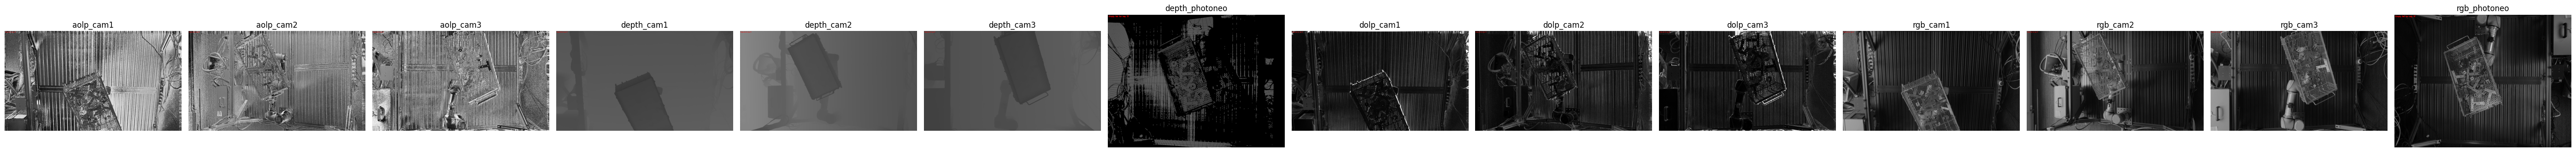

In [54]:
# Plot sample images side by side with labels extracted from JSON.
num_cameras = len(camera_folders)
fig, axs = plt.subplots(1, num_cameras, figsize=(4 * num_cameras, 5))
if num_cameras == 1:
    axs = [axs]

for i, cam in enumerate(camera_folders):
    image_file = sample_images_dict[cam]
    
    # Initialize label_text
    label_text = "No valid label found"
    
    # Try to load the JSON file associated with this camera folder.
    json_path = camera_json_map.get(cam, None)
    if json_path and os.path.exists(json_path):
        with open(json_path, "r") as f:
            data = json.load(f)
        # Iterate over keys in sorted order (e.g., "0", "1", ...)
        for key in sorted(data.keys()):
            entries = data[key]
            if isinstance(entries, list) and len(entries) > 0:
                entry = entries[0]
                # Try to extract the translation vector
                if "cam_t_m2c" in entry:
                    cam_translation = entry["cam_t_m2c"]
                    label_text = f"cam_t_m2c: {np.array(cam_translation).round(2)}"
                    break
                elif "cam_t_w2c" in entry:
                    cam_translation = entry["cam_t_w2c"]
                    label_text = f"cam_t_w2c: {np.array(cam_translation).round(2)}"
                    break
                else:
                    label_text = f"No translation info in key {key}"
            else:
                label_text = f"Empty list for key '{key}'"
    else:
        label_text = "No JSON found"

    print(f"Camera: {cam}, Label: {label_text}")
    
    # Read the sample image and overlay the label.
    if image_file:
        img = cv2.imread(image_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.putText(img_rgb, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (255, 0, 0), 2, cv2.LINE_AA)
        axs[i].imshow(img_rgb)
    else:
        axs[i].text(0.5, 0.5, 'No Image', ha='center', va='center', fontsize=12)
    
    axs[i].set_title(cam)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [51]:
if json_files:
    # Choose the first JSON file
    json_file = os.path.join(scene_path, json_files[0])
    print(f"Reading JSON file: {json_file}")
    with open(json_file, "r") as f:
        data = json.load(f)
    print("Keys in the JSON file:")
    print(data.keys())
    
    # Pretty print the content of the JSON (for a limited depth)
    import pprint
    pp = pprint.PrettyPrinter(indent=2)
    pp.pprint(data)
else:
    print("No JSON files found in the scene.")

Reading JSON file: ../ipd_val/val/000000\scene_camera_cam1.json
Keys in the JSON file:
dict_keys(['0', '1', '2', '3', '4', '5'])
{ '0': { 'cam_K': [ 3981.985991142684,
                    0.0,
                    1954.1872863769531,
                    0.0,
                    3981.985991142684,
                    1103.6978149414062,
                    0.0,
                    0.0,
                    1.0],
         'cam_R_w2c': [ -0.9918202298617356,
                        0.00510680324482199,
                        0.12754039573225862,
                        -0.03428900748708631,
                        -0.9731310990788762,
                        -0.22768427366043642,
                        0.12295078715145417,
                        -0.23019510254571493,
                        0.9653462176649855],
         'cam_t_w2c': [ -337.4470492221228,
                        587.8991738764912,
                        -10.381216800868486],
         'depth_scale': 0.1},
  '1': { 'cam_K'